In [1]:
import networkx as nx
import Complexity as cx
import matplotlib.pyplot as plt
import utilities as ut
import numpy as np
import matplotlib as mpl
from math import log

In [2]:
methods = ["C1est","C1espec","C2espec","OdC","MAg","MAri","Cr","Ce"]

In [31]:
#Generates random graphs and data
n=7
graphs,df = ut.random_networks(n=n,use_all_m = True,sample_number = 50)

In [32]:
#Find the complexities of the graphs
results = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in graphs]
    results.append(temp_result)

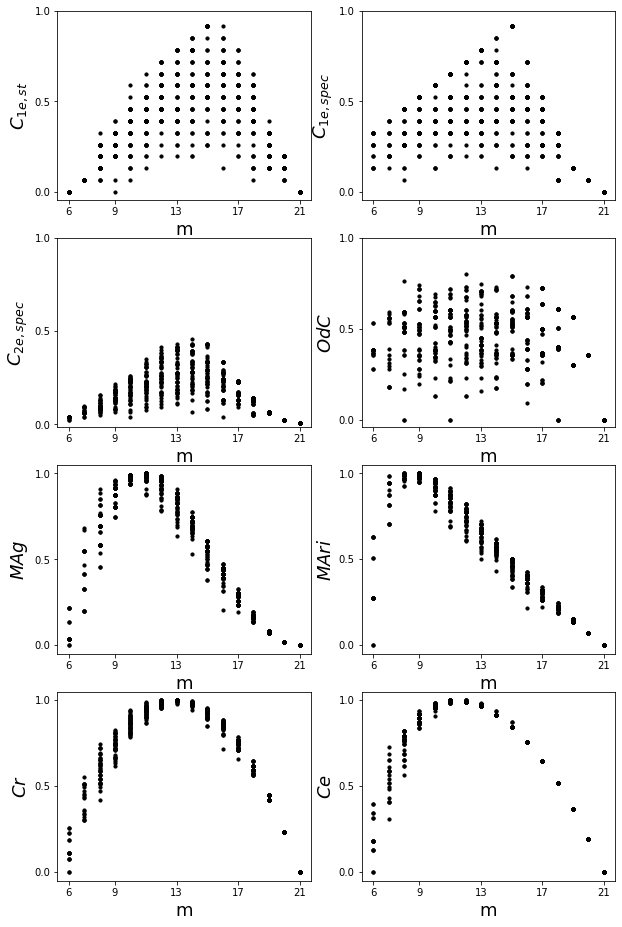

In [33]:
n=7
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter(df["Number_of_edges"],results[c],s=10,color = "black")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_xticks(xticks)
        axes[i][j].set_xlabel("m",fontsize = 18)
        axes[i][j].set_ylabel("$"+methods[c]+"$",fontsize = 18)
        c+=1
axes[0][0].set_ylabel("$C_{1e,st}$")
axes[0][1].set_ylabel("$C_{1e,spec}$")
axes[1][0].set_ylabel("$C_{2e,spec}$")
plt.savefig("figures/complexities.eps",format="eps")
plt.show()

In [9]:
n=25
corr_use_graphs,df = ut.random_networks(n,False,1000)
corr_results = []
corr_results.append([cx.C1est(g) for g in corr_use_graphs])
corr_results.append([cx.OdC(g) for g in corr_use_graphs])
corr_results.append([cx.MAri(g) for g in corr_use_graphs])

corr_use_BA = ut.BA_random_graphs(n,200)
corr_results_BA = []
corr_results_BA.append([cx.C1est(g) for g in corr_use_BA])
corr_results_BA.append([cx.OdC(g) for g in corr_use_BA])
corr_results_BA.append([cx.MAri(g) for g in corr_use_BA])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


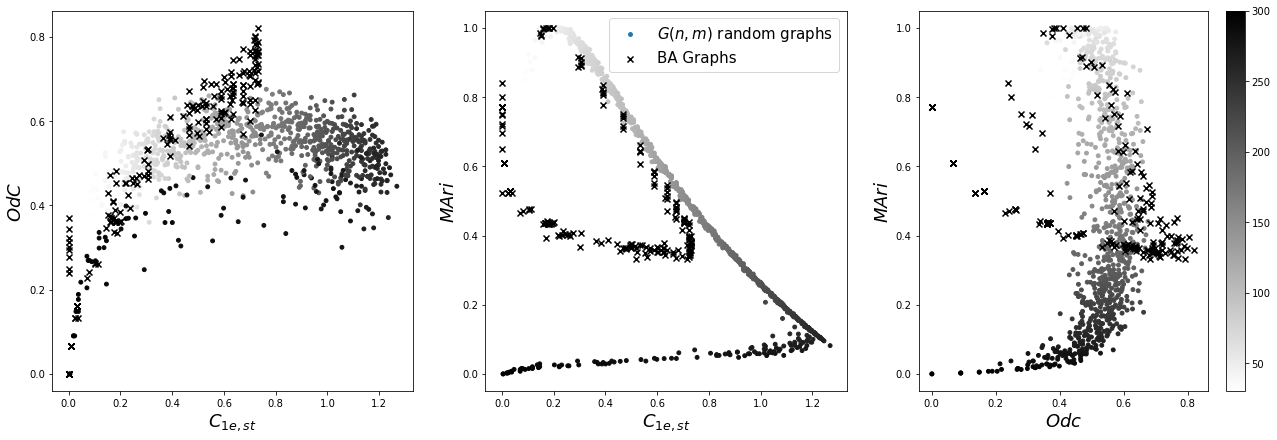

In [29]:
plt.figure(figsize=(22,7))
plt.subplot(1,3,1)
plt.scatter(corr_results[0],
                corr_results[1],
                s=15,c = df["Number_of_edges"],cmap = "binary",label = "$G(n,m)$ random graphs")
plt.scatter(corr_results_BA[0],corr_results_BA[1],color="black",marker = "x",label = "BA Graphs")
plt.xlabel("$C_{1e,st}$",fontsize = 18);plt.ylabel("$OdC$",fontsize = 18);

plt.subplot(1,3,2)
plt.scatter(corr_results[0],
                corr_results[2],
                s=15,c = df["Number_of_edges"],cmap = "binary",label = "$G(n,m)$ random graphs")
plt.scatter(corr_results_BA[0],corr_results_BA[2],color="black",marker = "x",label = "BA Graphs")
plt.xlabel("$C_{1e,st}$",fontsize = 18);plt.ylabel("$MAri$",fontsize = 18);
plt.legend(fontsize = 15)
plt.subplot(1,3,3)
plt.scatter(corr_results[1],
                corr_results[2],
                s=15,c = df["Number_of_edges"],cmap = "binary",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(corr_results_BA[1],corr_results_BA[2],color="black",marker = "x",label = "BA Graphs")
plt.xlabel("$Odc$",fontsize = 18);plt.ylabel("$MAri$",fontsize = 18);

plt.savefig("figures/complexity_correlation.eps",format = "eps")


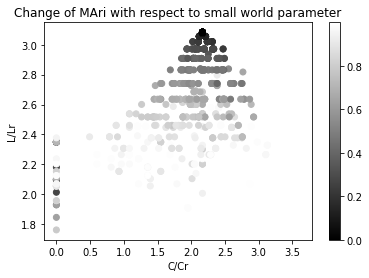

In [7]:
clusters = [nx.average_clustering(g) for g in graphs]
distances = [nx.average_shortest_path_length(g) for g in graphs]
Cr = [len(g.edges)/(n*(n-1/2)) for g in graphs]
Lr = [log(n)/(2*len(g.edges)/n) for g in graphs]
c_ratio = [item/item1 for item,item1 in zip(clusters,Cr)]
l_ratio = [item/item1 for item,item1 in zip(distances,Lr)]
plt.scatter(c_ratio,l_ratio, c = results[7],cmap = "gray")
plt.colorbar()
plt.xlabel("C/Cr")
plt.ylabel("L/Lr")
plt.savefig("small_world.eps",format = "eps")

In [13]:
#Generates special random graphs
n = 20
randoms,random_df = ut.random_networks(n,False,500)
BA_graphs = ut.BA_random_graphs(n=n,sample_number = 100)
WS_graphs = ut.WS_random_graphs(n=n,sample_number = 100)
NW_graphs = ut.NW_random_graphs(n=n,sample_number = 100)

In [14]:
#Calculates the complexity of special random graphs
rd_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in randoms]
    rd_result.append(temp_result)
BA_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in BA_graphs]
    BA_result.append(temp_result)

WS_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in WS_graphs]
    WS_result.append(temp_result)

NW_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in NW_graphs]
    NW_result.append(temp_result)

KeyboardInterrupt: 

In [ ]:
# Calculates the complexities of special graphs
n=20
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter([len(g.edges) for g in randoms],rd_result[c],s=15,color = "black",alpha = 0.7,label = "$G(n,m)$")
        axes[i][j].scatter([len(g.edges) for g in BA_graphs],BA_result[c],s=15,color = "green",label = "BA")
        axes[i][j].scatter([len(g.edges) for g in WS_graphs],WS_result[c],marker = "x",s=15,color = "red",label = "WS")
        axes[i][j].scatter([len(g.edges) for g in NW_graphs],NW_result[c],marker = "s",s=15,color = "blue",label = "NW")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_ylabel("$"+methods[c]+"$")
        axes[i][j].set_xlabel("m")
        axes[i][j].set_xticks(xticks)
        c+=1
axes[0][0].set_ylabel("$C_{1e,st}$")
axes[0][1].set_ylabel("$C_{1e,spec}$")
axes[1][0].set_ylabel("$C_{2e,spec}$")
axes[0][0].legend()
plt.legend()
plt.savefig("figures/complexities_sp.eps",format="eps")
plt.show()

In [6]:
#Analyse Complement graphs complexity
graphs,df = ut.random_networks(25,False,1000)
BA_graphs = ut.BA_random_graphs(25, 100)
complement_graphs = [ut.complement_graph(g) for g in graphs]
c = []
g = []
edges = []
for i in range(len(complement_graphs)):
    if complement_graphs[i] !=None:
        c.append(complement_graphs[i])
        g.append(graphs[i])
        edges.append(df["Number_of_edges"][i])
    
BA_comp = [ut.complement_graph(g) for g in BA_graphs]
ba_c = []
ba_g = []
for i in range(len(BA_comp)):
    if BA_comp[i] !=None:
        ba_c.append(BA_comp[i])
        ba_g.append(BA_graphs[i])


In [7]:
results1 = [cx.OdC(item) for item in g]
results_c = [cx.OdC(g) for g in c]
ba_result = [cx.OdC(g) for g in ba_c]
ba_result_c = [cx.OdC(g) for g in ba_g]

results2 = [cx.MAri(item) for item in g]
results_c_1 = [cx.MAri(g) for g in c]
ba_result_1 = [cx.MAri(g) for g in ba_c]
ba_result_c_1 = [cx.MAri(g) for g in ba_g]

results3 = [cx.C1est(item) for item in g]
results_c_2 = [cx.C1est(g) for g in c]
ba_result_2 = [cx.C1est(g) for g in ba_c]
ba_result_c_2 = [cx.C1est(g) for g in ba_g]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


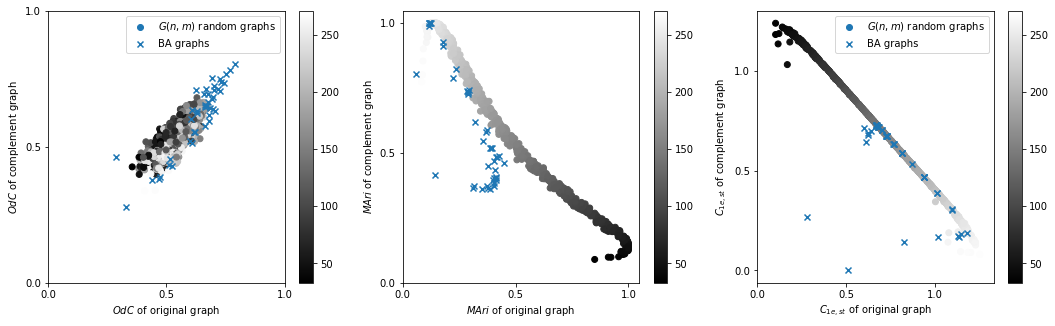

In [15]:
plt.figure(figsize = (18,5))
plt.subplot(1,3,1)


plt.scatter(results1,results_c,c = edges,cmap="gray",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(ba_result,ba_result_c,marker = "x",label = "BA graphs")
plt.xlabel("$OdC$ of original graph",fontsize = 18)
plt.ylabel("$OdC$ of complement graph",fontsize = 18)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.legend(fontsize = 18)
plt.subplot(1,3,2)

plt.scatter(results2,results_c_1,c = edges,cmap="gray",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(ba_result_1,ba_result_c_1,marker = "x",label = "BA graphs")
plt.xlabel("$MAri$ of original graph",fontsize = 18)
plt.ylabel("$MAri$ of complement graph",fontsize = 18)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])


plt.subplot(1,3,3)

plt.scatter(results3,results_c_2,c = edges,cmap="gray",label = "$G(n,m)$ random graphs")
plt.colorbar()
plt.scatter(ba_result_2,ba_result_c_2,marker = "x",label = "BA graphs")
plt.xlabel("$C_{1e,st}$ of original graph",fontsize = 18)
plt.ylabel("$C_{1e,st}$ of complement graph",fontsize = 18)
plt.xticks([0,0.5,1])
plt.yticks([0,0.5,1])
plt.legend(fontsize = 18)
plt.savefig("figures/complement.eps",format="eps")

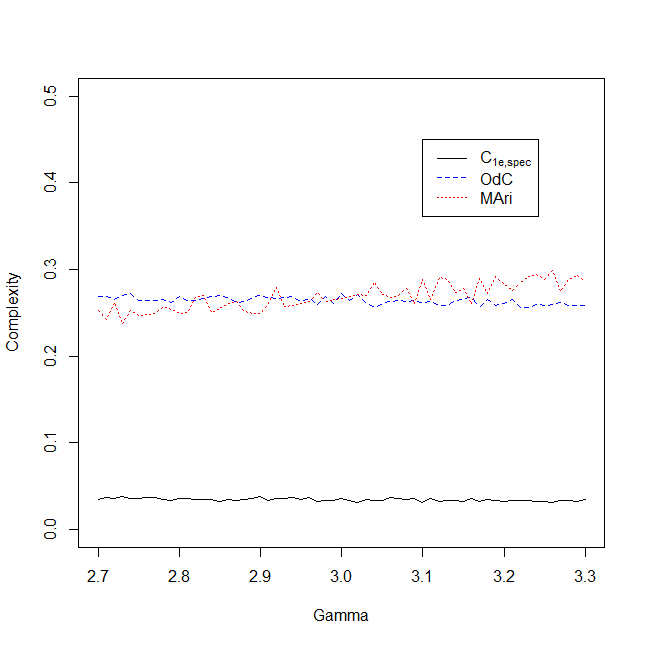

In [24]:
from IPython import display
display.Image("./figures/configuration_model.png")